# ADS Assignment-3



```
# This is formatted as code
```

### Nikhilesh Goud
### 20BEC1011

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('/Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


### Uni varient

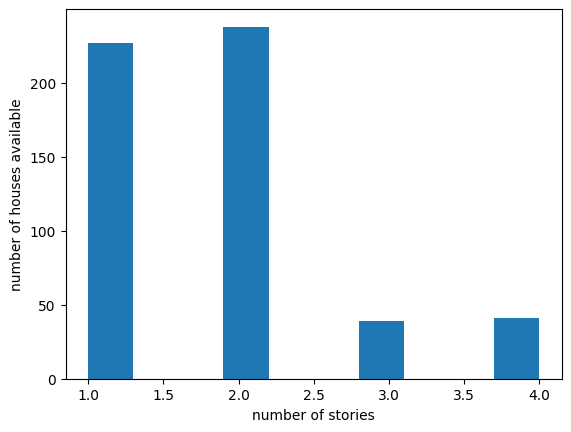

In [3]:
plt.hist(data['stories'])
plt.xlabel('number of stories')
plt.ylabel('number of houses available')
plt.show()

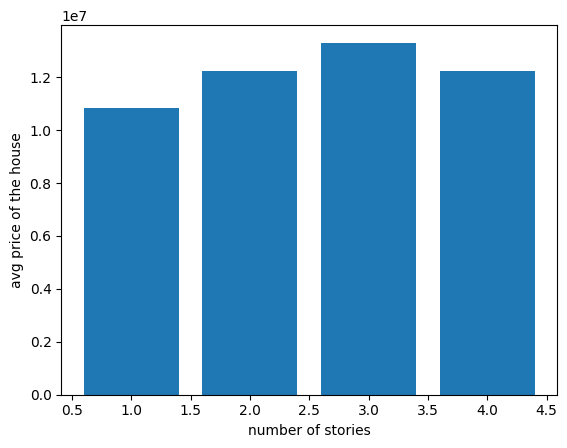

In [4]:
plt.bar(data['stories'],data['price'])
plt.xlabel('number of stories')
plt.ylabel('avg price of the house')
plt.show()

### Bi varient

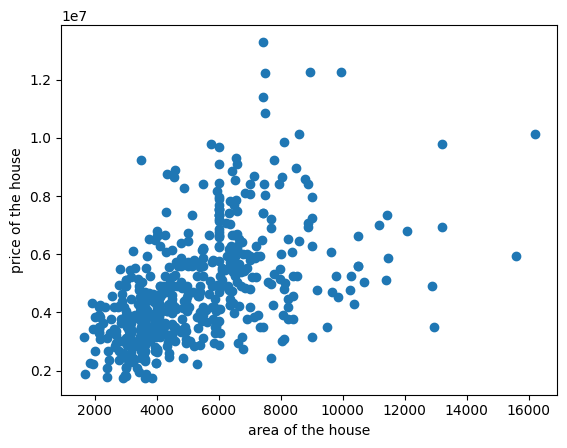

In [5]:
plt.scatter(data['area'],data['price'])
plt.xlabel('area of the house')
plt.ylabel('price of the house')
plt.show()

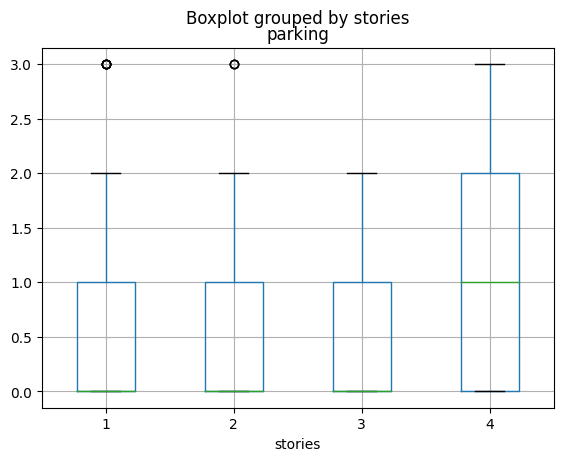

In [6]:
data.boxplot('parking','stories')
plt.show()

### Multi varient

<ipython-input-7-d901d6faafdc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


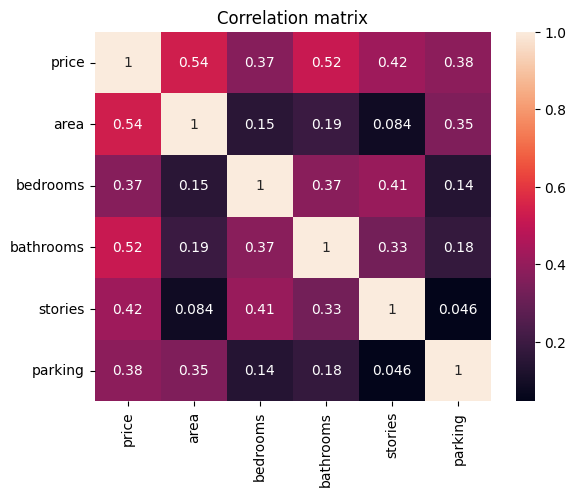

In [7]:
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

### Descriptive Statistics

In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Cheching and dealing with missing values

In [9]:
missing=data.isnull().sum()
missing

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [10]:
#there are no missing data incase missing data are present we can replace them with mean of that column of the data
#data1=data.fillna(data.mean())
#data1

### Detecting and dealing with Outliers

In [11]:
numeric_columns = data.select_dtypes(include='number').columns
data_no_outliers = data.copy()

for column in numeric_columns:
    z_scores = (data[column] - data[column].mean()) / data[column].std()

    outliers = (z_scores > 3) | (z_scores < -3)
column_name=['price','area','bedrooms','bathrooms','stories','parking']
data_no_outliers.loc[np.abs(z_scores) > 3, column_name] = data[column].mean()

data_no_outliers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,semi-furnished
3,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,furnished
4,11410000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,yes,no,yes,no,no,2.0,unfurnished
541,1767150.0,2400.0,3.0,1.0,1.0,no,no,no,no,no,0.0,semi-furnished
542,1750000.0,3620.0,2.0,1.0,1.0,yes,no,no,no,no,0.0,unfurnished
543,1750000.0,2910.0,3.0,1.0,1.0,no,no,no,no,no,0.0,furnished


### Checking Categorical columns and encoding

In [12]:
categorical_columns=data.select_dtypes('object','category').columns
encoded_data=pd.get_dummies(data,categorical_columns)

encoded_data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


### Splitting into dependent and independent data

In [14]:
dependent_data=data_no_outliers['price']
dependent_data

0      13300000.0
1      12250000.0
2      12250000.0
3      12215000.0
4      11410000.0
          ...    
540     1820000.0
541     1767150.0
542     1750000.0
543     1750000.0
544     1750000.0
Name: price, Length: 545, dtype: float64

In [15]:
independent_data=data_no_outliers.drop('price',axis=1)
independent_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,furnished
1,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,furnished
2,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,semi-furnished
3,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,furnished
4,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,3000.0,2.0,1.0,1.0,yes,no,yes,no,no,2.0,unfurnished
541,2400.0,3.0,1.0,1.0,no,no,no,no,no,0.0,semi-furnished
542,3620.0,2.0,1.0,1.0,yes,no,no,no,no,0.0,unfurnished
543,2910.0,3.0,1.0,1.0,no,no,no,no,no,0.0,furnished


### Scaling the independent data

In [23]:
independent_var=independent_data.select_dtypes('number')
independent_var

,area,bedrooms,bathrooms,stories,parking
0,7420.0,4.0,2.0,3.0,2.0
1,8960.0,4.0,4.0,4.0,3.0
2,9960.0,3.0,2.0,2.0,2.0
3,7500.0,4.0,2.0,2.0,3.0
4,7420.0,4.0,1.0,2.0,2.0
...,...,...,...,...,...
540,3000.0,2.0,1.0,1.0,2.0
541,2400.0,3.0,1.0,1.0,0.0
542,3620.0,2.0,1.0,1.0,0.0
543,2910.0,3.0,1.0,1.0,0.0


In [24]:
sclr=StandardScaler()
scaled=sclr.fit_transform(independent_var)
scaled

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, -0.92939666, -0.80574124],
       [-1.03338891,  0.04727831, -0.57018671, -0.92939666, -0.80574124],
       [-0.5998394 ,  0.04727831, -0.57018671,  0.22441013, -0.80574124]])

### Splitting the data into Training and Testing data

In [25]:
x_train,x_test,y_train,y_test=train_test_split(scaled,dependent_data,test_size=0.2,random_state=10)

In [26]:
x_train

array([[-0.38306464,  0.04727831, -0.57018671, -0.92939666,  0.35597563],
       [ 0.11505607,  0.04727831, -0.57018671, -0.92939666,  2.67940935],
       [-1.07628264,  1.40341936,  1.42181174,  0.22441013,  0.35597563],
       ...,
       [-1.52874228, -1.30886273, -0.57018671, -0.92939666, -0.80574124],
       [ 4.81952946,  0.04727831, -0.57018671, -0.92939666,  1.51769249],
       [-1.04722559,  0.04727831, -0.57018671,  0.22441013, -0.80574124]])

In [27]:
x_test

array([[-0.92269542,  0.04727831, -0.57018671,  0.22441013, -0.80574124],
       [-0.51220705, -1.30886273, -0.57018671,  0.22441013,  0.35597563],
       [-0.30004453,  1.40341936,  1.42181174,  0.22441013,  1.51769249],
       [ 0.11505607,  1.40341936, -0.57018671,  0.22441013, -0.80574124],
       [ 0.3917898 ,  1.40341936,  1.42181174,  2.53202371,  1.51769249],
       [ 0.71925804,  0.04727831,  1.42181174,  0.22441013,  0.35597563],
       [ 1.1758687 , -1.30886273, -0.57018671, -0.92939666, -0.80574124],
       [-0.71514512,  0.04727831, -0.57018671,  0.22441013,  0.35597563],
       [-1.08412342,  0.04727831,  1.42181174,  0.22441013,  0.35597563],
       [-0.65979837, -1.30886273, -0.57018671, -0.92939666, -0.80574124],
       [ 0.3917898 ,  0.04727831, -0.57018671, -0.92939666,  0.35597563],
       [-0.69900232, -1.30886273, -0.57018671, -0.92939666, -0.80574124],
       [-1.44618339,  0.04727831, -0.57018671,  0.22441013, -0.80574124],
       [-0.41996247,  0.04727831, -0.5

In [28]:
y_train

443    3220000.0
323    4025000.0
157    5495000.0
231    4690000.0
351    3780000.0
         ...    
369    3675000.0
320    4060000.0
527    2275000.0
125    5943000.0
265    4403000.0
Name: price, Length: 436, dtype: float64

In [29]:
y_test

482    2940000.0
314    4095000.0
383    3570000.0
487    2870000.0
43     7700000.0
         ...    
98     6293000.0
307    4165000.0
399    3500000.0
214    4865000.0
173    5250000.0
Name: price, Length: 109, dtype: float64

### Creating the model

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR

In [31]:
model1=LinearRegression()
model2=LogisticRegression()
model3=RandomForestRegressor(random_state=42)
model4=DecisionTreeClassifier(criterion='entropy',random_state=0)
model5=SVR()

### Training the models

In [32]:
model1.fit(x_train,y_train)

LinearRegression()

In [33]:
model2.fit(x_train,y_train)

LogisticRegression()

In [34]:
model3.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [35]:
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
model5.fit(x_train,y_train)

SVR()

### Testing the models

In [37]:
y_pred1=model1.predict(x_test)

In [38]:
y_pred2=model2.predict(x_test)

In [39]:
y_pred3=model3.predict(x_test)

In [40]:
y_pred4=model4.predict(x_test)

In [41]:
y_pred5=model5.predict(x_test)

In [42]:
y_pred1

array([ 3651111.51615361,  4079537.61885261,  6176820.61585599,
        4675112.2385528 ,  7788114.89515948,  6381314.4368112 ,
        4484747.38197334,  4154633.27794423,  5002050.94330468,
        3080791.19165212,  4460157.49495376,  3050807.20266285,
        3250737.07494392,  4035612.08083958,  5650095.94606231,
        3044601.15163584,  7463350.80968896,  5232814.84141006,
        5490782.15086578,  5045502.69077322,  3049043.43860466,
        2795061.41422494,  6314395.24402428,  5074627.82896872,
        4905419.13476537,  4406395.56800222,  4014774.19343682,
        4553141.14530063,  3179561.9789109 ,  3940368.82169718,
        3296594.94045692,  4727818.50907908,  5943417.31424697,
        5345695.74113438,  7146788.03806675,  4856835.84460529,
        4699114.6480155 ,  2720983.32378085,  4327026.18538356,
        5210399.57367183,  4317814.33015038,  5908255.50377982,
        3386546.90742474,  5456646.1000548 ,  5562471.94354635,
        6984622.76781207, 10974389.32980

In [43]:
y_pred2

array([4200000., 3780000., 4200000., 3500000., 8400000., 4200000.,
       4900000., 4200000., 4200000., 3150000., 3500000., 3150000.,
       4200000., 4900000., 4900000., 3150000., 6300000., 5600000.,
       4200000., 5600000., 3150000., 2660000., 5600000., 4760000.,
       3500000., 4900000., 4200000., 3780000., 3150000., 4200000.,
       4200000., 4200000., 4480000., 5600000., 5250000., 3150000.,
       3500000., 2660000., 4900000., 3150000., 4900000., 5600000.,
       4200000., 5250000., 5250000., 7962500., 6790000., 4340000.,
       3150000., 4200000., 4200000., 4900000., 5600000., 4200000.,
       3150000., 4900000., 3290000., 4900000., 3150000., 4200000.,
       3150000., 3150000., 4200000., 4200000., 4900000., 3500000.,
       3150000., 3290000., 2660000., 7350000., 2660000., 5250000.,
       4900000., 3150000., 3150000., 4200000., 4200000., 4900000.,
       7210000., 3500000., 4900000., 5950000., 4200000., 3430000.,
       4200000., 3290000., 5250000., 9681000., 3150000., 26600

In [44]:
y_pred3

array([ 3532340.        ,  4290300.        ,  5715780.        ,
        4641560.        ,  7440664.44444444,  6792170.46666667,
        3034850.        ,  4062991.33333333,  3670800.        ,
        3005566.66666667,  5873342.33333333,  3623433.33333333,
        3189526.66666667,  4647136.66666667,  6706840.        ,
        3030440.        ,  7562450.        ,  5792523.33333333,
        5080483.33333333,  5976518.33333333,  3457445.83333333,
        2611700.        ,  5303480.        ,  4330900.        ,
        4650030.        ,  5281640.        ,  4369890.        ,
        4523925.        ,  3079069.58333333,  3919055.        ,
        3397706.66666667,  4789190.        ,  4359250.        ,
        5914300.        ,  6998740.        ,  4321520.        ,
        4054855.        ,  3179610.        ,  5393780.        ,
        6321000.        ,  4896360.        ,  4557367.5       ,
        3685111.5       ,  5780926.66666667,  6244939.4       ,
        6463975.        ,  6848975.     

In [45]:
y_pred4

array([ 3570000.,  3325000.,  4970000.,  4900000.,  9100000.,  8043000.,
        4970000.,  3500000.,  2800000.,  4095000.,  6629000.,  3675000.,
        3430000.,  5250000.,  8400000.,  3220000.,  3150000.,  5110000.,
        3990000.,  5250000.,  3675000.,  3010000.,  6615000.,  8855000.,
        4900000.,  2730000.,  3535000.,  7875000.,  2695000.,  4410000.,
        3332000.,  2485000.,  3773000.,  6650000.,  3150000.,  5803000.,
        3675000.,  3220000.,  5950000.,  3010000.,  4620000.,  2940000.,
        4200000.,  5383000.,  5523000.,  6090000.,  9800000.,  2485000.,
        2450000.,  3500000.,  2485000.,  4900000.,  4382000.,  3570000.,
        3010000.,  6020000.,  3710000.,  2870000.,  3010000.,  3780000.,
        7455000.,  3010000.,  5145000.,  4410000.,  4235000.,  6300000.,
        3990000.,  4235000.,  2520000.,  5873000.,  2450000.,  6615000.,
        8043000.,  5950000.,  3255000.,  3570000.,  3332000.,  8645000.,
        7980000.,  5740000.,  3150000.,  9800000., 

In [46]:
y_pred5

array([4339963.74904185, 4339968.7780853 , 4340034.83982371,
       4340003.46479983, 4340037.49667552, 4340038.49256881,
       4339985.26300725, 4339979.74940705, 4340010.23557542,
       4339942.01690805, 4339991.61307292, 4339941.8067364 ,
       4339963.0647234 , 4339970.67264414, 4340023.87213431,
       4339953.46015226, 4340039.25439691, 4340014.4792232 ,
       4340023.70870434, 4340011.72633734, 4339941.79579233,
       4339941.87384838, 4340023.04363024, 4340010.53571791,
       4340011.51051057, 4339988.72451209, 4339995.06509423,
       4339980.25796605, 4339943.0280757 , 4339968.44028752,
       4339962.80041089, 4340002.81012523, 4340022.8948581 ,
       4340016.71020428, 4340041.31645419, 4340001.78184421,
       4340008.11879349, 4339942.50664956, 4339985.77510085,
       4340006.57053358, 4339978.82559088, 4340025.63190806,
       4339962.53283058, 4340016.47988929, 4340018.25822272,
       4340023.36041908, 4340013.76148337, 4340017.80778657,
       4339953.13120231,

### Measuring the performance using metrics

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score, precision_score, recall_score

In [50]:
mse1=mean_squared_error(y_test,y_pred1)
rmse1=np.sqrt(mse1)
r2=r2_score(y_test,y_pred1)
print("Linear Regression mse=",mse1)
print('Linear Regression rmse=',rmse1)
print("Linear Regression R2Score=",r2)

Linear Regression mse= 1007650078767.6519
Linear Regression rmse= 1003817.751769539
Linear Regression R2Score= 0.6416199512557832


In [51]:
mse2=mean_squared_error(y_test,y_pred2)
rmse2=np.sqrt(mse2)
r2=r2_score(y_test,y_pred2)
print("Linear Regression mse=",mse2)
print('Linear Regression rmse=',rmse2)
print("Linear Regression R2Score=",r2)

Linear Regression mse= 1770055995412.844
Linear Regression rmse= 1330434.513763396
Linear Regression R2Score= 0.3704632517948526


In [52]:
mse1=mean_squared_error(y_test,y_pred3)
rmse1=np.sqrt(mse1)
r2=r2_score(y_test,y_pred3)
print("Linear Regression mse=",mse1)
print('Linear Regression rmse=',rmse1)
print("Linear Regression R2Score=",r2)

Linear Regression mse= 1628492595521.6956
Linear Regression rmse= 1276124.051776196
Linear Regression R2Score= 0.42081158126199614


In [53]:
mse1=mean_squared_error(y_test,y_pred4)
rmse1=np.sqrt(mse1)
r2=r2_score(y_test,y_pred4)
print("Linear Regression mse=",mse1)
print('Linear Regression rmse=',rmse1)
print("Linear Regression R2Score=",r2)

Linear Regression mse= 3613073103211.0093
Linear Regression rmse= 1900808.5393355663
Linear Regression R2Score= -0.28502278928889213


In [54]:
mse1=mean_squared_error(y_test,y_pred5)
rmse1=np.sqrt(mse1)
r2=r2_score(y_test,y_pred5)
print("Linear Regression mse=",mse1)
print('Linear Regression rmse=',rmse1)
print("Linear Regression R2Score=",r2)

Linear Regression mse= 2882158660430.241
Linear Regression rmse= 1697692.157144587
Linear Regression R2Score= -0.025066323099775856
